# Self-organising Map

## Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import image as img
import random
from PIL import Image

## Question 1

In [2]:
# access [row][column][r/g/b]
k_rows = 5
j_cols = 5
i_dims = 3
weight_vec = np.zeros((k_rows,j_cols,i_dims,))

In [3]:
for col in range(j_cols):
    for row in range(k_rows):
        weight_vec[col][row][0] = int(random.randint(0,256))
        weight_vec[col][row][1] = int(random.randint(0,256))
        weight_vec[col][row][2] = int(random.randint(0,256))


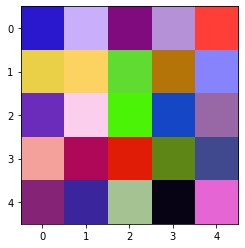

In [4]:
from PIL import Image
import numpy as np

data = np.array(weight_vec,dtype=np.uint8)
img = Image.fromarray(data, 'RGB')
img.save('Q1.png')
plt.imshow(img)

## Question 2

In [5]:
rgb = np.array([[[255,0,0],[0,128,0],[0,0,255],[0,100,0],[0,0,139],[255,255,0],[255,165,0],[128,128,128]]])

In [6]:
def euclid_dist(vec_1,vec_2):
    total = 0
    for i in range(3):
        total+= (vec_1[i]-vec_2[i])**2
    sqrt = np.sqrt(total)
    return sqrt
print(euclid_dist(rgb[0][0],rgb[0][1]))


285.3226244096321


In [7]:
def max_dist(vecs):
    count=0
    max_dict = {
        'dist':-1,
        'coords1':[-1,-1],
        'coords2':[-1,-1]
    }
    for x1 in range(vecs.shape[0]):
        for y1 in range(vecs.shape[1]):
            for x2 in range(vecs.shape[0]):
                for y2 in range(vecs.shape[1]):
                    if not(x1 == x2 and y1 ==y2):
                        dist = euclid_dist(vecs[x1][y1],vecs[x2][y2])
                        if dist > max_dict['dist']:
                            max_dict['dist'] = dist,
                            max_dict['coords1'] = [x1,y1]
                            max_dict['coords2'] = [x2,y2]
    return max_dict
print(max_dist(rgb))
max_dist_dict = max_dist(rgb)

{'dist': (441.6729559300637,), 'coords1': [0, 2], 'coords2': [0, 5]}


In [8]:
def max_dist_2(vecs , max_dist_dict):
    max1_x = max_dist_dict['coords1'][0]
    max1_y = max_dist_dict['coords1'][1]
    max2_x = max_dist_dict['coords2'][0]
    max2_y = max_dist_dict['coords2'][1]
    max_dict = {
        'dist':-1,
        'coords':[-1,-1],
    }

    
    for i in range(vecs.shape[0]):
        for j in range(vecs.shape[1]):
            dist_1 = euclid_dist(vecs[i][j] , vecs[max1_x][max1_y])
            dist_2 = euclid_dist(vecs[i][j] , vecs[max2_x][max2_y])
            if (dist_1+dist_2) > max_dict['dist']:
                max_dict['dist'] = dist_1+dist_2
                max_dict['coords'] = [i,j]
    return max_dict
print(max_dist_2(rgb , max_dist_dict))
max_dist_dict_2 = max_dist_2(rgb , max_dist_dict)

{'dist': 615.6244584051392, 'coords': [0, 0]}


In [9]:
def max_dist_3(vecs , max_dist_dict , max_dist_dict_2):
    max1_x = max_dist_dict['coords1'][0]
    max1_y = max_dist_dict['coords1'][1]
    max2_x = max_dist_dict['coords2'][0]
    max2_y = max_dist_dict['coords2'][1]
    max3_x = max_dist_dict_2['coords'][0]
    max3_y = max_dist_dict_2['coords'][1]
    
    max_dict = {
        'dist':-1,
        'coords':[-1,-1],
    }

    
    for i in range(vecs.shape[0]):
        for j in range(vecs.shape[1]):
            dist_1 = euclid_dist(vecs[i][j] , vecs[max1_x][max1_y])
            dist_2 = euclid_dist(vecs[i][j] , vecs[max2_x][max2_y])
            dist_3 = euclid_dist(vecs[i][j] , vecs[max3_x][max3_y])
            if (dist_1+dist_2+dist_3) > max_dict['dist']:
                max_dict['dist'] = dist_1+dist_2+dist_3
                max_dict['coords'] = [i,j]
    return max_dict
print(max_dist_3(rgb , max_dist_dict,max_dist_dict_2))
max_dist_dict_3 = max_dist_3(rgb , max_dist_dict,max_dist_dict_2)

{'dist': 855.5206601836009, 'coords': [0, 1]}


[array([  0,   0, 255]), array([255, 255,   0]), array([255,   0,   0]), array([  0, 128,   0])]
[[0, 2], [0, 5], [0, 0], [0, 1]]


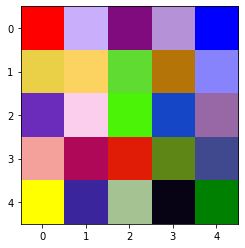

In [10]:
max1_x = max_dist_dict['coords1'][0]
max1_y = max_dist_dict['coords1'][1]
max2_x = max_dist_dict['coords2'][0]
max2_y = max_dist_dict['coords2'][1]
max3_x = max_dist_dict_2['coords'][0]
max3_y = max_dist_dict_2['coords'][1]
max4_x = max_dist_dict_3['coords'][0]
max4_y = max_dist_dict_3['coords'][1]

point1 = rgb[max1_x][max1_y]
point2 = rgb[max2_x][max2_y]
point3 = rgb[max3_x][max3_y]
point4 = rgb[max4_x][max4_y]
points = [point1,point2,point3,point4,]
extreme_coords = [
    [max1_x , max1_y],       
    [max2_x , max2_y],
    [max3_x , max3_y],
    [max4_x , max4_y],    
]
print(points)
print(extreme_coords)
weight_vec[0][j_cols-1] = points[0]
weight_vec[k_rows-1][0] = points[1]
weight_vec[0][0] = points[2]
weight_vec[k_rows-1][j_cols-1] = points[3]

data = np.array(weight_vec,dtype=np.uint8)
img = Image.fromarray(data, 'RGB')
img.save('my.png')
plt.imshow(img)


## Question 3 & 4

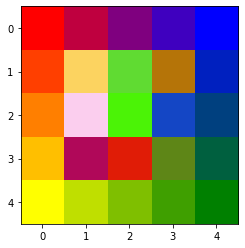

In [11]:
def boundary_init(vecs):
    vec_copy = vecs.copy()
    row_1 = []
    row_2 = []
    col_1 = []
    col_2 =  []
    for j in range(1 , j_cols-1):
        numerator = (vecs[0][j_cols-1] - vecs[0][0])
        denominator = (j_cols-1)
        weight = vecs[0][0]+ ((j+1)-1)*(numerator/denominator)
        vec_copy[0][j] = weight
        row_1.append(weight)

        numerator = (vecs[k_rows-1][j_cols-1] - vecs[k_rows-1][0])
        denominator = (j_cols-1)
        weight = vecs[k_rows-1][0]+ ((j+1)-1)*(numerator/denominator)
        vec_copy[k_rows-1][j] = weight
        row_2.append(weight)
    
    for k in range(1 , k_rows-1):
        numerator = (vecs[k_rows-1][0] - vecs[0][0])
        denominator = (k_rows-1)
        weight = vecs[0][0]+ ((k+1)-1)*(numerator/denominator)
        vec_copy[k][0] = weight
        col_1.append(weight)

        numerator = (vecs[k_rows-1][j_cols-1] - vecs[0][j_cols-1])
        denominator = (k_rows-1)
        weight = vecs[0][j_cols-1]+ ((k+1)-1)*(numerator/denominator)
        vec_copy[k][j_cols-1] = weight
        col_2.append(weight)
    data = np.array(vec_copy,dtype=np.uint8)
    img = Image.fromarray(data, 'RGB')
    img.save('my.png')
    plt.imshow(img)
    return vec_copy
weight_vec_2 = boundary_init(weight_vec)

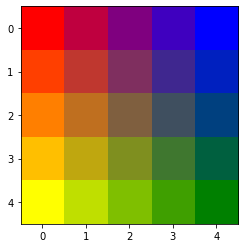

In [12]:
def centre_init(vecs):
    vecs_copy = vecs.copy()
    for j in range(1 , j_cols-1):
        for k in range(1 , k_rows-1):
            numerator = vecs[k][j_cols-1] - vecs[k][0]
            denominator = j_cols-1
            weight = vecs[k][0] + ((j+1)-1)*(numerator/denominator)
            vecs_copy[k][j] = weight
    data = np.array(vecs_copy,dtype=np.uint8)
    img = Image.fromarray(data, 'RGB')
    img.save('Q4.png')
    plt.imshow(img)
    return vecs_copy
weight_vec_3 = centre_init(weight_vec_2)

## Question 5

In [13]:
weight_vec_3[2][2]

array([127.5 ,  95.75,  63.75])

In [14]:
def winner(instance ,vec):
    winner = {
        'dist':100000,
        'row':-1,
        'column':-1
    }    
    for j in range(j_cols):
        for k in range(k_rows):
            dist = euclid_dist(vec[k][j] , instance)
            if dist < winner['dist']: 
                winner['dist'] = dist
                winner['row'] = k
                winner['column'] = j
    
    return winner

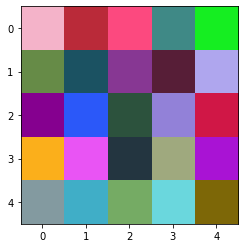

In [15]:
test_instance = np.array([0,128,0])
test_vec = np.array([
    [
        [244,179,201], [186,42,57], [252,73,127], [63,137,134] , [21,238,33],
    ],[
        [102,139,71], [27,82,98], [135,55,147], [87,30,55], [175,166,238],   
    ],[
        [133,0,143], [43,88,249], [44,82,61], [146,129,216], [208,23,70],
    ],[
        [251,175,27], [233,84,244], [35,53,64], [159,169,126], [169,19,212]
    ],[
       [131,154,160], [64,174,199], [117,171,100], [106,215,221], [125,103,7] 
    ]
])
data = np.array(test_vec,dtype=np.uint8)
img = Image.fromarray(data, 'RGB')
img.save('my.png')
plt.imshow(img)

In [16]:
print(winner(test_instance,test_vec))
print(test_vec[2][2])

{'dist': 88.16461875378354, 'row': 2, 'column': 2}
[44 82 61]


## Question 6

In [17]:
def neighbourhood(eta , width , winner_coords , given_coords):
    numerator = (np.sqrt((winner_coords[0] - given_coords[0])**2 + (winner_coords[1] - given_coords[1])**2))**2
    # numerator = (euclid_dist(winner_coords , given_coords))**2
    denominator = 2 * (width)**2
    neighbourhood = eta * np.exp(-1*(numerator/denominator))
    return neighbourhood
eta_ = 1
width_ = 2
winning_coords_ = test_vec[2][2]

for j in range(j_cols):
    for k in range(k_rows):
        print(neighbourhood(eta_ , width_, [2,2], [j+1,k+1]))
    print('\n')

0.7788007830714049
0.8824969025845955
0.7788007830714049
0.5352614285189902
0.28650479686019004


0.8824969025845955
1.0
0.8824969025845955
0.6065306597126334
0.32465246735834974


0.7788007830714049
0.8824969025845955
0.7788007830714049
0.5352614285189902
0.28650479686019004


0.5352614285189902
0.6065306597126334
0.5352614285189902
0.3678794411714422
0.1969116752041941


0.28650479686019004
0.32465246735834974
0.28650479686019004
0.1969116752041941
0.10539922456186439




## Question 7

In [18]:
def q_error(instances , winner_vec):
    total = 0
    for i in range(instances.shape[0]):
        total += (euclid_dist(instances[i], winner_vec))**2
    return total

flat_rgb = rgb.reshape([rgb.shape[1],rgb.shape[2]])
winner_dict = winner(test_instance,test_vec)
winner_ = test_vec[winner_dict['row']][winner_dict['column']]
q_error(flat_rgb , winner_)

276723.0

## Question 8

In [19]:
def decay(learning_rate, t, max_iter):
    """Decay function of the learning process.
    Parameters
    ----------
    learning_rate : float
        current learning rate.
    t : int
        current iteration.
    max_iter : int
        maximum number of iterations for the training.
    """
    return learning_rate / (1+t/(max_iter/2))


In [20]:
image = Image.open('self-portrait_1998.74.5.jpg')
data = np.asarray(image)
data = data.reshape(-1,3)

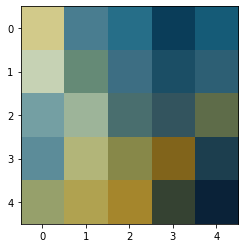

In [21]:
def batch_map(instances):
    # -------------------------Initialise Weights and Params------------------------- #
    # access [row][column][r/g/b]
    k_rows = 5
    j_cols = 5
    i_dims = 3
    weight_vec = np.zeros((k_rows,j_cols,i_dims,))    
    eta = 0.5
    width = 1
    epochs = 20
    max_iter = epochs
    errors = []
    widths = []
    etas  = []
    for col in range(j_cols):
        for row in range(k_rows):
            weight_vec[col][row][0] = int(random.randint(0,256))
            weight_vec[col][row][1] = int(random.randint(0,256))
            weight_vec[col][row][2] = int(random.randint(0,256))
    for i in range(epochs):
        win_count = np.zeros((k_rows,j_cols))
        win_sum = np.zeros((k_rows,j_cols,i_dims,))
        win_avg = np.zeros((k_rows,j_cols,i_dims,))
        # --------------- Get win counts and sum instance values for the winning neuron
        error = 0
        for x in range(len(instances)):
            winner_dict = winner(instances[x],weight_vec)
            error += winner_dict['dist']
            win_count[winner_dict['row']][winner_dict['column']]+=1
            win_sum[winner_dict['row']][winner_dict['column']]+=instances[x]
        
        # --------------- Get the average for each neuron
        for j in range(j_cols):
            for k in range(k_rows):
                if win_count[k][j] != 0:
                    win_avg[k][j]=win_sum[k][j]/win_count[k][j]
                else:
                    win_avg[k][j]= np.array([0,0,0])
        # --------------- Weight Updates
        for j in range(j_cols):
            for k in range(k_rows):
                numerator = 0
                denominator = 0
                for n in range(j_cols):
                    for m in range(k_rows):
                        base_calc = win_count[m][n]*neighbourhood(eta , width, [m+1,n+1], [j+1,k+1])
                        denominator += base_calc
                        numerator += base_calc*win_avg[m][n]
                weight_vec[k][j] = numerator/denominator
        
        # --------------- Store history of params for plotting                
        errors.append(error)
        etas.append(eta)
        widths.append(width)
        # --------------- Decay learning rate and width
        eta = decay(eta,epochs,max_iter)
        width = decay(width,epochs,max_iter)

    data = np.array(weight_vec,dtype=np.uint8)
    img = Image.fromarray(data, 'RGB')
    img.save('Q8.png')
    plt.imshow(img)

    return weight_vec, errors , etas, widths
new_weights,errors , etas, widths = batch_map(data)

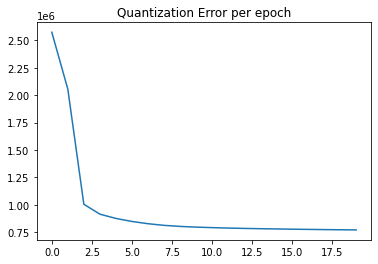

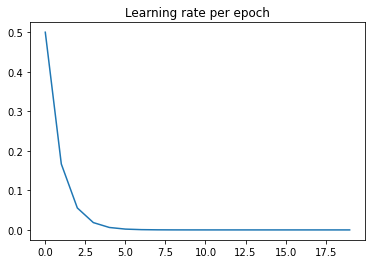

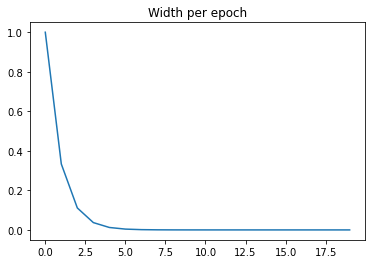

In [22]:
plt.plot(errors)
plt.title('Quantization Error per epoch')
plt.savefig('quant_error.png')
plt.show()
plt.plot(etas)
plt.title('Learning rate per epoch')
plt.savefig('eta.png')
plt.show()
plt.plot(widths)
plt.title('Width per epoch')
plt.savefig('width.png')
plt.show()

## Question 9

In [23]:
image = Image.open('self-portrait_1998.74.5.jpg')
data = np.asarray(image)
original_shape =data.shape
data = data.reshape(-1,3)

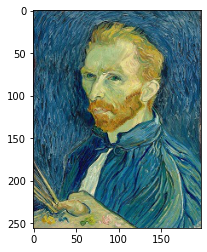

In [26]:
plt.imshow(image)

In [24]:
data_new = data.copy()
for x in range(len(data)):
    winner_dict = winner(data[x] , new_weights)
    data_new[x] = new_weights[winner_dict['row']][winner_dict['column']]

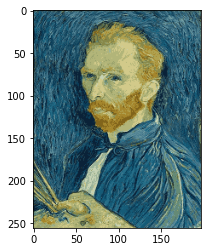

In [25]:
data_new_3 = data_new.reshape(original_shape)
data = np.array(data_new_3,dtype=np.uint8)
img = Image.fromarray(data, 'RGB')
img.save('Q9.png')
plt.imshow(img)

In [ ]:
plt.